In [1]:
!pip install numpy 
!pip install pandas

In [2]:
import matplotlib.pyplot as plt
import  seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
#import a daaset & perform EDA, missing value analysis, loc,iloc, groupby with respect to one column and Visulization also...

In [3]:
Am=pd.read_csv(r'C:\Users\CP\Downloads\cars.csv')
Am

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.
...,...,...,...,...,...,...,...,...
256,17.0,8,305,130,3840,15,1980,US.
257,36.1,4,91,60,1800,16,1979,Japan.
258,22.0,6,232,112,2835,15,1983,US.
259,18.0,6,232,100,3288,16,1972,US.


In [4]:
Am.head(2)

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.


In [5]:
Am.tail()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
256,17.0,8,305,130,3840,15,1980,US.
257,36.1,4,91,60,1800,16,1979,Japan.
258,22.0,6,232,112,2835,15,1983,US.
259,18.0,6,232,100,3288,16,1972,US.
260,22.0,6,250,105,3353,15,1977,US.


In [6]:
Am.describe()

,mpg,cylinders,hp,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,106.360153,15.547893,1976.819923
std,7.823570,1.733310,40.499959,2.910625,3.637696
min,10.000000,3.000000,46.000000,8.000000,1971.000000
25%,16.900000,4.000000,75.000000,14.000000,1974.000000
50%,22.000000,6.000000,95.000000,16.000000,1977.000000
75%,28.800000,8.000000,138.000000,17.000000,1980.000000
max,46.600000,8.000000,230.000000,25.000000,1983.000000


In [7]:
Am.isnull()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
256,False,False,False,False,False,False,False,False
257,False,False,False,False,False,False,False,False
258,False,False,False,False,False,False,False,False
259,False,False,False,False,False,False,False,False


In [8]:
Am.isnull().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

In [9]:
Am.shape

(261, 8)

In [10]:
Sm=Am.replace(' ',np.nan)

In [11]:
Sm.isnull().sum()

mpg            0
cylinders      0
cubicinches    2
hp             0
weightlbs      3
time-to-60     0
year           0
brand          0
dtype: int64

In [12]:
Sm.isnull().sum()*100/len(Sm)

mpg            0.000000
cylinders      0.000000
cubicinches    0.766284
hp             0.000000
weightlbs      1.149425
time-to-60     0.000000
year           0.000000
brand          0.000000
dtype: float64

In [13]:
Am=Sm.dropna(axis=0)

In [14]:
Am=Sm.dropna(axis=0)

In [15]:
Am.isnull().sum()*100/len(Am)

mpg            0.0
cylinders      0.0
cubicinches    0.0
hp             0.0
weightlbs      0.0
time-to-60     0.0
year           0.0
brand          0.0
dtype: float64

In [16]:
Am.loc[2:4,'hp':'year']

,hp,weightlbs,time-to-60,year
2,140,3449,11,1971
3,150,3761,10,1971
4,63,2051,17,1978


In [17]:
Am.iloc[2:5,3:7]

,hp,weightlbs,time-to-60,year
2,140,3449,11,1971
3,150,3761,10,1971
4,63,2051,17,1978


In [18]:
Am.head(2)

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.


In [19]:
cars=Am.groupby('cylinders')
cars['cylinders'].agg([np.sum,np.mean,np.std])

,sum,mean,std
cylinders,,,
3,6,3.0,0.0
4,496,4.0,0.0
5,15,5.0,0.0
6,306,6.0,0.0
8,608,8.0,0.0


In [20]:
g=Am.groupby('cylinders')
g.agg({'hp':'sum','time-to-60':'max'})

,hp,time-to-60
cylinders,,
3,200,14
4,9607,25
5,247,20
6,5185,21
8,12102,22


In [21]:
Am['cylinders'].value_counts()

4    124
8     76
6     51
5      3
3      2
Name: cylinders, dtype: int64

In [22]:
cars=Am.groupby('cylinders')
cars.filter(lambda x:len(x)<=30)

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
8,25.4,5,183,77,3530,20,1980,Europe.
37,21.5,3,80,110,2720,14,1978,Japan.
156,18.0,3,70,90,2124,14,1974,Japan.
171,20.3,5,131,103,2830,16,1979,Europe.
252,36.4,5,121,67,2950,20,1981,Europe.


In [23]:
a=Am['cylinders']
b=Am['mpg']

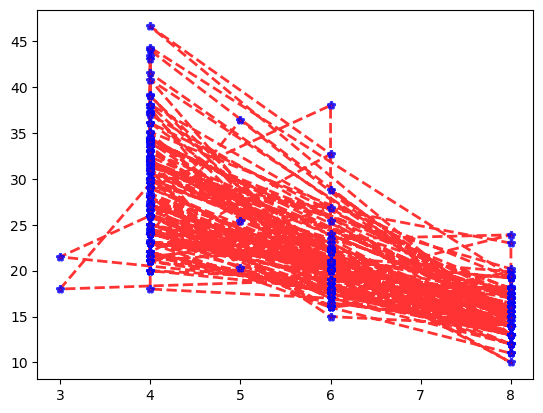

In [24]:
#Line plot

plt.plot(a,b,color='red',linewidth=2.0,linestyle='--',alpha=0.8,marker='*',markeredgecolor='b',markeredgewidth='2.0')
plt.show()

In [25]:
#New Dataset
diabetes=pd.read_csv(r'C:\Users\CP\Downloads\diabetes.csv')

In [26]:
diabetes.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [27]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [28]:
#plot a graph to ceck how many people have diabetes wrt blood preasure and age
x=diabetes['BloodPressure']
y=diabetes['Age']
z=diabetes['Outcome']

Text(0.5, 0, 'Outcome')

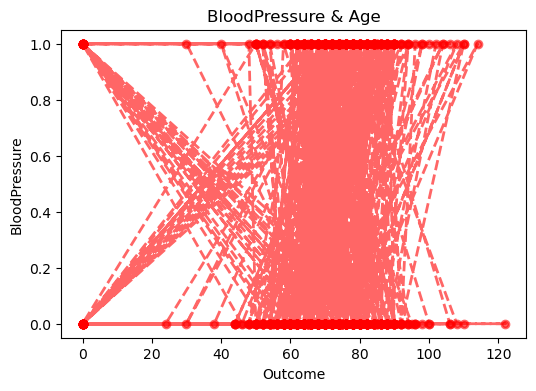

In [29]:
# line plot

plt.figure(figsize=(6,4))
plt.plot(x,z,color='red',linewidth=2.0,linestyle='--',alpha=0.6,marker='.',markersize=10,markeredgecolor='red',markeredgewidth='2.0')
plt.title('BloodPressure & Age')
plt.ylabel('BloodPressure')
plt.xlabel('Outcome')


Text(0, 0.5, 'Age')

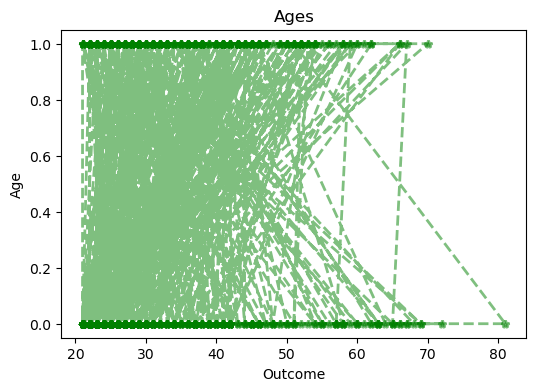

In [30]:
# line plot

plt.figure(figsize=(6,4))
plt.plot(y,z,color='green',linewidth=2.0,linestyle='--',alpha=0.5,marker='*',markeredgecolor='green',markeredgewidth='2.0')
plt.title('Ages')
plt.xlabel('Outcome')
plt.ylabel('Age')


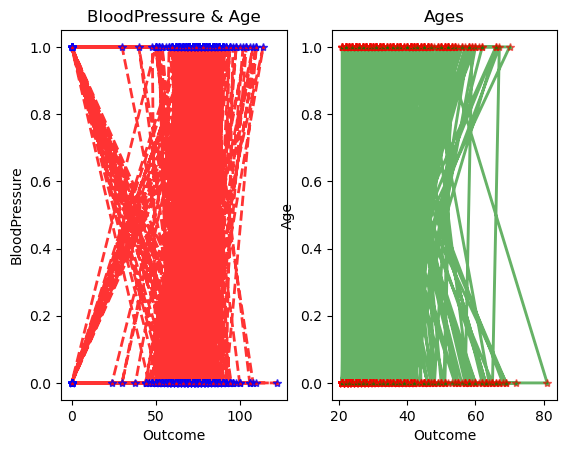

In [31]:
#Sub line plot

plt.subplot(1,2,1)
plt.plot(x,z,color='red',linewidth=2.0,linestyle='--',alpha=0.8,marker='*',markeredgecolor='blue')
plt.title('BloodPressure & Age')
plt.ylabel('BloodPressure')
plt.xlabel('Outcome')

plt.subplot(1,2,2)
plt.plot(y,z,color='green',linewidth=2.1,linestyle='-',alpha=0.6,marker='*',markeredgecolor='red')
plt.title('Ages')
plt.xlabel('Outcome')
plt.ylabel('Age')
plt.show()


In [32]:
a=diabetes['BloodPressure']
b=diabetes['Pregnancies']
c=diabetes['SkinThickness']
d=diabetes['Insulin']



Text(0.5, 0, 'Insulin')

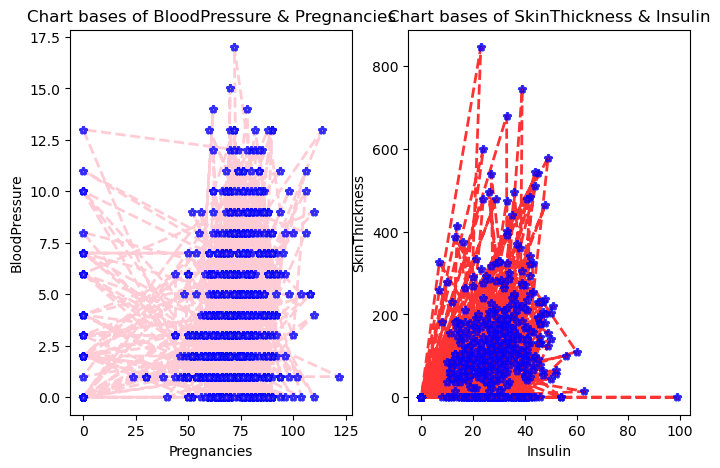

In [33]:

plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.plot(a,b,color='pink',linewidth=2.0,linestyle='--',alpha=0.8,marker='*',markeredgecolor='blue',markeredgewidth='2.0')
plt.title('Chart bases of BloodPressure & Pregnancies')
plt.ylabel('BloodPressure')
plt.xlabel('Pregnancies')


plt.subplot(1,2,2)
plt.plot(c,d,color='red',linewidth=2.0,linestyle='--',alpha=0.8,marker='*',markeredgecolor='blue',markeredgewidth='2.0')
plt.title('Chart bases of SkinThickness & Insulin')
plt.ylabel('SkinThickness')
plt.xlabel('Insulin')




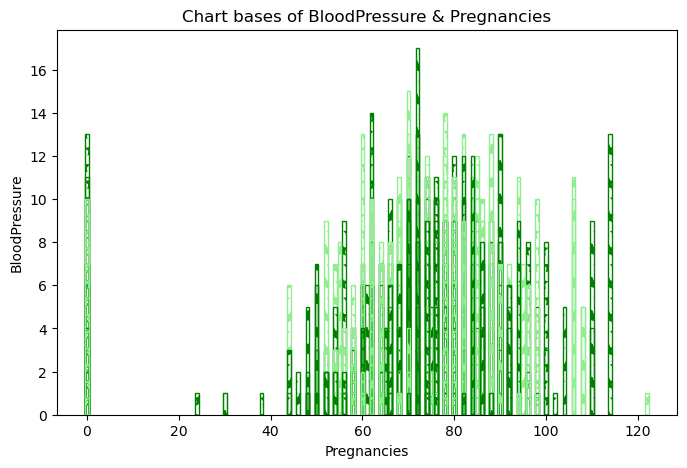

In [62]:
#Bar Chart
plt.figure(figsize=(8,5))
plt.bar(a,b,color='hotpink',fill=None,ec=['lightgreen','green'],hatch='*')
plt.title('Chart bases of BloodPressure & Pregnancies')
plt.ylabel('BloodPressure')
plt.xlabel('Pregnancies')
plt.show()

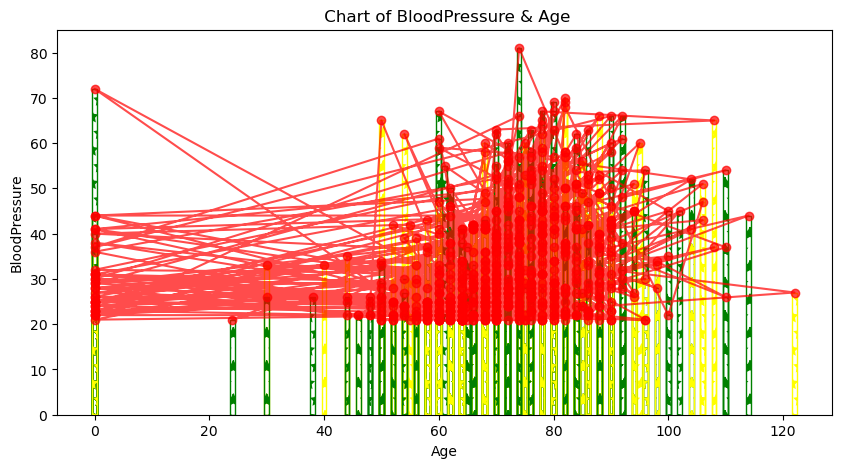

In [34]:
#Bar Chart & line plot

plt.figure(figsize=(10,5))
plt.plot(x,y,color='red',marker='o',alpha=0.7)
plt.bar(x,y,color='hotpink',fill=None,ec=['yellow','green'],hatch='*')
plt.title(' Chart of BloodPressure & Age')
plt.ylabel('BloodPressure')
plt.xlabel('Age')
plt.show()

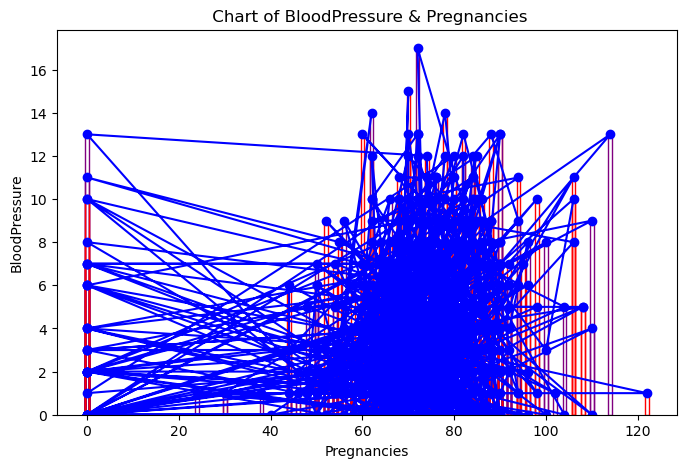

In [35]:
#Bar Chart & line plot

plt.figure(figsize=(8,5))
plt.plot(a,b,color='b',marker='o')
plt.bar(a,b,color='b',fill=None,ec=['red','purple'])
plt.title(' Chart of BloodPressure & Pregnancies')
plt.ylabel('BloodPressure')
plt.xlabel('Pregnancies')
plt.show()

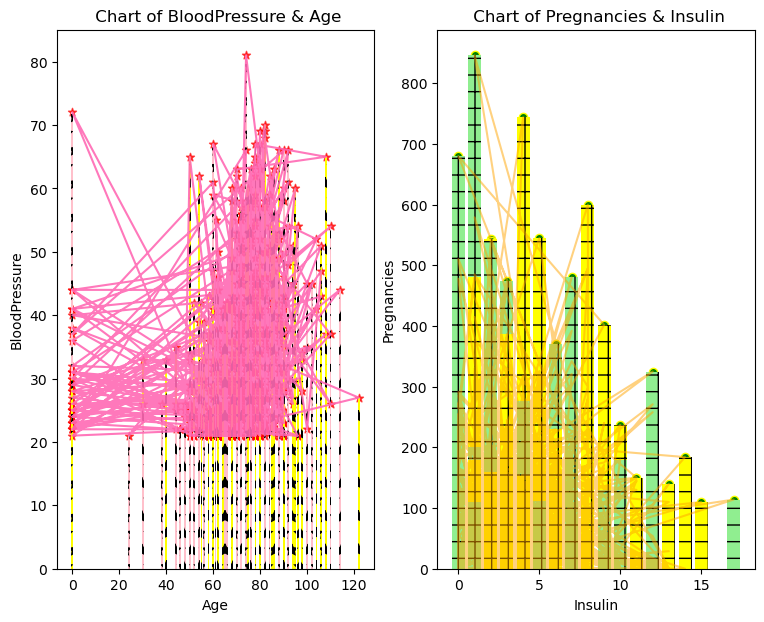

In [36]:
plt.figure(figsize=(9,7))
plt.subplot(1,2,1)
plt.scatter(x,y,color='red',alpha=0.7,marker="*")
plt.plot(x,y,alpha=0.9,color='hotpink')
plt.bar(x,y,color=['yellow','pink'],hatch='*')
plt.title(' Chart of BloodPressure & Age')
plt.ylabel('BloodPressure')
plt.xlabel('Age')

plt.subplot(1,2,2)
plt.scatter(b,d,color='green',marker="o",ec='yellow')
plt.plot(b,d,alpha=0.5,color='orange')
plt.bar(b,d,color=['yellow','lightgreen'],hatch='+')
plt.title(' Chart of Pregnancies & Insulin')
plt.ylabel('Pregnancies')
plt.xlabel('Insulin')
plt.show()

In [38]:
Am['cylinders'].value_counts()

4    124
8     76
6     51
5      3
3      2
Name: cylinders, dtype: int64

In [40]:
x=Am['cylinders']
y=Am['cubicinches']


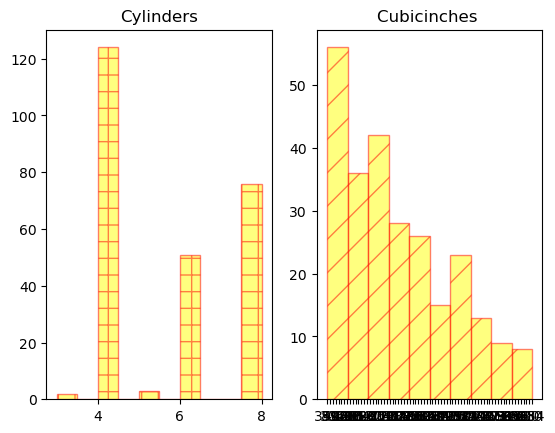

In [41]:
#Histogram chart

plt.subplot(1,2,1)
plt.hist(x,color='yellow',hatch='+',fill='none',alpha=0.5,ec='red')
plt.title('Cylinders')


plt.subplot(1,2,2)
plt.hist(y,color='yellow',fill='none',alpha=0.5,ec='red',hatch='/')
plt.title('Cubicinches ')

plt.show()

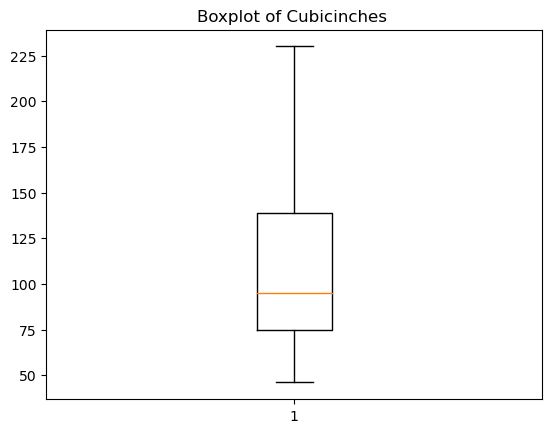

In [42]:
#Boxplot chart
plt.boxplot(Am['hp'])
plt.title('Boxplot of Cubicinches ')
plt.show()

In [ ]:
#Outlier Culculation

In [43]:
q1=Am['time-to-60'].quantile(0.25)
q1

14.0

In [44]:
q3=Am['time-to-60'].quantile(0.75)
q3

17.0

In [45]:
iqr=q3-q1
iqr

3.0

In [46]:
ll=q1-(1.5*iqr)
ll

9.5

In [47]:
ul=q3+(1.5*iqr)
ul

21.5

In [48]:
x=Am['cylinders'].value_counts()

In [49]:
y=x.keys().tolist()
z=x.values.tolist()


In [50]:
y

[4, 8, 6, 5, 3]

In [51]:
z

[124, 76, 51, 3, 2]

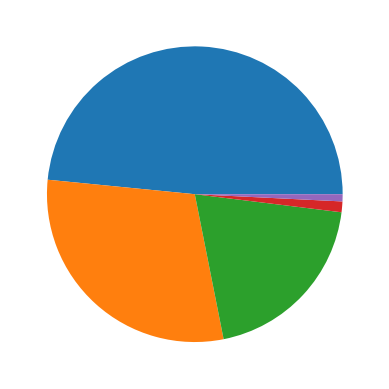

In [52]:
#Pie Chart

plt.pie(x)
plt.show()